## Project IMHOTEP
Notebook exploring SSS variations (interannual) at different gridpoints in the bay of bengal from the IMHOTEP ensemble simulations.

#### Import modules

In [1]:
## standart libraries

import os,sys
import numpy as np

# xarray
import xarray as xr

# plot
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap

import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from matplotlib import cm 
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

import cartopy.feature as cfeature


# custom tools for plotting
sys.path.append('./')
from libimhotep import libSLXtoolsIMHOTEP as li


import cmocean

# for jupyter notebook display
%matplotlib inline

import pkg_resources


import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'hatch.color': '#086A87'})

# list packages to be checked
root_packages = [
     'numpy', 
    'matplotlib', 'cartopy', 'cmocean']

# print versions, but check if package is imported first
for m in pkg_resources.working_set:
    if m.project_name.lower() in root_packages:
        print(f"{m.project_name}=={m.version}")

Name: libimhotep.libSLXtoolsIMHOTEP
Package: libimhotep
This is a collection of  tools i often use when analysing the IMHOTEP project data.
numpy==1.20.0
matplotlib==3.3.4
cmocean==2.0
Cartopy==0.18.0


In [21]:
prefix = "eORCA025.L75-IMHOTEP"

# NAME of ENSEMBLE EXPERIMENT:
# "EAI": all runoffs varying
# "ES": all runoffs climatological
nexp = "ES"

varnasss = 'sosaline'

# ensemble size
NE=10

# years to read data from:
y1='1980'
y2='2018'

fo="1y" # output frequency

# input directory on work for grid info
diri="/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/"

# plot directory
diro="/gpfswork/rech/cli/regi915/PLT/dec2022/"+fo+"/"

# data output directory
dirdat="/gpfswork/rech/cli/regi915/DAT/"


## Grid point locations
* Here we select 5 grid points (NGP=5)

* Those grid points are located at lonvalue °E on a North-South line starting at latitude latNvalue and decreasing toward south with an increment of latinc°.

In [13]:
NGP = 5   # nb of points to look at

lonvalue= 86  # I tried 88 or 90

latNvalue=19.5   
latinc=1.5

# get lat lon values and corresponding grid indices
gpx=[0] * NGP
gpy=[0] * NGP
gplon=[0] * NGP
gplat=[0] * NGP
for ii in range(0,NGP):
    gpx[ii],gpy[ii] = li.Ffindij(diri,latNvalue-ii*latinc,lonvalue)
    gplat[ii]=latNvalue-ii*latinc
    gplon[ii]=lonvalue
    print(gplat[ii])


19.5
18.0
16.5
15.0
13.5


In [4]:
print(gplat)
print(gplon)

[21.0, 19.5, 18.0, 16.5, 15.0]
[92, 92, 92, 92, 92]


## Read data at gridpoints:

In [22]:
allts = li.FloadmultiGP(NE,nexp,prefix,varnasss,fo,"gridTsurf",y1,y2,gpx=gpx,gpy=gpy,verbose=False).compute()       
#allts = allgp.compute()


## PLOT time series of SSS at each grid point for each ensemble member
Each ensemble is plotted in the same color

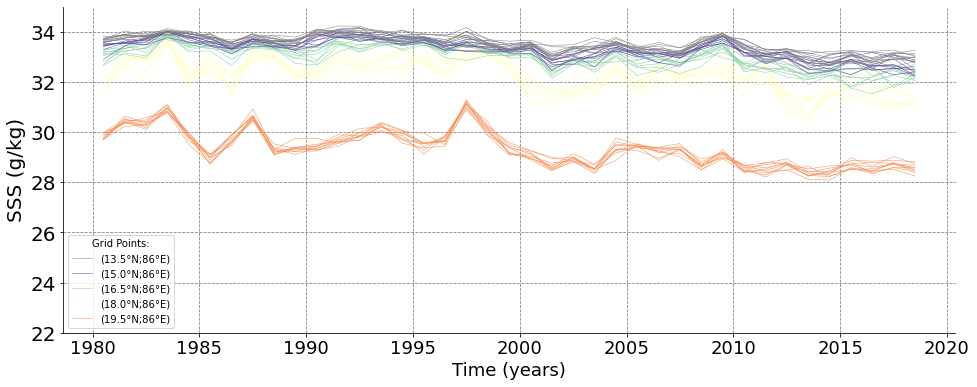

In [23]:
namo="ts_indo"+str(gplon[0])+"_"+nexp
gp = 0

# create a color_list of NP different colors
cmap = cm.get_cmap('Spectral', NGP)
color_list = [mcolors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
color_list = color_list[1:]+['gray']

# plot timeseries
fig1 = plt.figure(figsize=([16,6]),facecolor='white')  

for igp in range(0,allts.gp.size,1):
    for ie in range(0,allts.e.size):
        if ie==0:
            la="("+str(gplat[igp])+"°N;"+str(gplon[igp])+"°E)"
        else:
            la = ''
        allts.isel(e=ie,gp=igp).squeeze().plot(linewidth=0.5,color=color_list[igp],label=la)
    
#plt.fill_between(mocm_refA.time_counter,mocm_refA.isel(y=iyRapid)-2*sig.values,mocm_refA.isel(y=iyRapid)+2*sig.values,color="#aed6f1",alpha=0.8)
#plt.fill_between(mocm_refA.time_counter,mocm_refA.isel(y=iyRapid)-1*sig.values,mocm_refA.isel(y=iyRapid)+1*sig.values,color="#1f618d",alpha=0.8)

ax = plt.gca()    

ax.grid(which='both', color='grey', linestyle='--')
# Remove the plot frame lines. They are unnecessary chartjunk.  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(18)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=20)

ax.get_yaxis().set_tick_params(direction='out')
ax.get_xaxis().set_tick_params(direction='out')


plt.xticks(rotation=0, ha='center',va="top")
plt.xlabel("Time (years)")
plt.ylabel("SSS (g/kg)")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Grid Points:', loc='lower left')

#plt.legend()
plt.ylim(22,35)

plt.show()

# Save fig in png, resolution dpi    
li.Fsaveplt(fig1,diro,namo,dpifig=300)